In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from autorank import autorank, plot_stats, create_report, latex_table

In [3]:
#df = pd.read_csv(r"C:\Users\shubh\Desktop\XGB DNN\1407\res\AUROC_baseline.csv")
df = pd.read_csv(r"C:\Users\shubh\Desktop\XGB DNN\1407\res\Accuracy_fs.csv")
#df = df.drop('MLP',axis=1)
df = df.iloc[:,1:]
df

,SVM,NB,KNN,DT,RF,XGB,LGB,DNN,TabNet
0,0.758144,0.773201,0.700473,0.770360,0.825852,0.850568,0.847254,0.777367,0.868466
1,0.740685,0.781805,0.632229,0.696733,0.779236,0.783989,0.786432,0.602162,0.701880
2,0.720261,0.709215,0.615489,0.673672,0.724484,0.738015,0.741355,0.652592,0.683856
3,0.737368,0.702105,0.705789,0.794211,0.793421,0.788158,0.783158,0.777105,0.666579
4,0.673045,0.701683,0.927572,0.960274,0.969319,0.972336,0.970826,0.922027,0.975857
5,0.810462,0.793846,0.699385,0.802154,0.865077,0.857231,0.857385,0.822000,0.885385
6,0.784588,0.808672,0.788732,0.879537,0.907827,0.909296,0.914930,0.890865,0.873863
7,0.818991,0.820396,0.895279,0.961081,0.966468,0.962450,0.954432,0.954378,0.915387
8,0.785514,0.557053,0.753946,0.830062,0.857935,0.859778,0.861656,0.798529,0.814330
9,0.775418,0.640159,0.770052,0.863257,0.898207,0.898989,0.902871,0.867163,0.858606


In [4]:
result = autorank(df, alpha=0.01, verbose=True,approach = 'bayesian')
print(result)

Fail to reject null hypothesis that data is normal for column SVM (p=0.138323>=0.001111)
Fail to reject null hypothesis that data is normal for column NB (p=0.267302>=0.001111)
Fail to reject null hypothesis that data is normal for column KNN (p=0.330895>=0.001111)
Fail to reject null hypothesis that data is normal for column DT (p=0.520276>=0.001111)
Fail to reject null hypothesis that data is normal for column RF (p=0.655137>=0.001111)
Fail to reject null hypothesis that data is normal for column XGB (p=0.521510>=0.001111)
Fail to reject null hypothesis that data is normal for column LGB (p=0.547126>=0.001111)
Fail to reject null hypothesis that data is normal for column DNN (p=0.710614>=0.001111)
Fail to reject null hypothesis that data is normal for column TabNet (p=0.365368>=0.001111)
RankResult(rankdf=
            mean       std  ci_lower  ci_upper effect_size   magnitude  \
LGB     0.850716  0.081031  0.702882   0.99855         0.0  negligible   
XGB     0.850550  0.082198  0.70

In [5]:
create_report(result)

The statistical analysis was conducted for 9 populations with 11 paired samples.
The family-wise significance level of the tests is alpha=0.010.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.138). Therefore, we assume that all populations are normal.
We used a bayesian signed rank test to determine differences between the mean values of the populations and report the mean value (M) and the standard deviation (SD) for each population. We distinguish between populations being pair-wise smaller, equal, or larger and make a decision for one of these cases if we estimate that the posterior probability is at least alpha=0.010.
We used the effect size to define the region of practical equivalence (ROPE) around the mean value dynamically as 0.100*d.
We found significant and practically relevant differences between the populations LGB (M=0.851+-0.148, SD=0.081), XGB (M=0.851+-0.150, SD=0.082), RF (M=0.848+-0.154, SD=0.085),

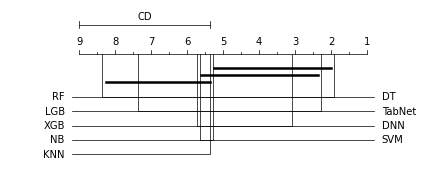

In [8]:
plot_stats(result)
plt.show()

In [9]:
latex_table(result)

\begin{table}[h]
\centering
\begin{tabular}{lrrrlll}
\toprule
{} &    MR &     M &    SD &              CI &    \$d\$ &   Magnitude \\
\midrule
DT     & 8.364 & 0.635 & 0.060 &  [0.571, 0.698] &  0.000 &  negligible \\
TabNet & 7.364 & 0.588 & 0.204 &  [0.372, 0.804] &  0.314 &       small \\
DNN    & 5.727 & 0.708 & 0.090 &  [0.613, 0.803] & -0.959 &       large \\
SVM    & 5.636 & 0.727 & 0.071 &  [0.652, 0.803] & -1.410 &       large \\
KNN    & 5.364 & 0.723 & 0.064 &  [0.655, 0.791] & -1.422 &       large \\
NB     & 5.273 & 0.729 & 0.057 &  [0.669, 0.789] & -1.622 &       large \\
XGB    & 3.091 & 0.779 & 0.098 &  [0.675, 0.882] & -1.779 &       large \\
LGB    & 2.273 & 0.785 & 0.096 &  [0.683, 0.887] & -1.879 &       large \\
RF     & 1.909 & 0.795 & 0.086 &  [0.704, 0.887] & -2.163 &       large \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


C:\Users\shubh\anaconda3\lib\site-packages\autorank\autorank.py:697: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table_string = table_df.to_latex(float_format=float_format, na_rep='-').strip()
